In [1]:
from cavity import *
from matplotlib import rc
import ipywidgets as widgets
from ipywidgets import Layout, FloatSlider, Checkbox, Dropdown, Text
np.set_printoptions(precision=10, linewidth=151)


# Set up explorations

In [2]:
dx = 1e-9
R_small_mirror = 5e-3
waist_to_left_mirror = None

def f(
    NA_left, waist_to_lens, waist_to_lens_fine, set_R_left_to_collimate, R_small_mirror, R_left, R_left_fine,
    set_R_right_to_collimate, set_R_right_to_equalize_angles, set_R_right_to_R_left,
    R_right, R_right_fine, collimation_mode, auto_set_big_mirror_radius, big_mirror_radius,
    auto_set_right_arm_length, right_arm_length, lens_fixed_properties, mirrors_fixed_properties,
    auto_set_x, x_span, auto_set_y, y_span,
    T_edge, h, camera_center, add_unheated_cavity,
    copy_input_parameters, copy_cavity_parameters, eval_box
):

    if copy_input_parameters:
        copy_parameters_func(locals())

    big_mirror_radius = None if auto_set_big_mirror_radius else big_mirror_radius
    right_arm_length = None if auto_set_right_arm_length else right_arm_length
    waist_to_lens += widget_convenient_exponent(waist_to_lens_fine)
    R_left += widget_convenient_exponent(R_left_fine)
    R_right += widget_convenient_exponent(R_right_fine)
    x_span = 10 ** x_span
    y_span = 10 ** y_span

    cavity = mirror_lens_mirror_cavity_generator(
        NA_left=NA_left, waist_to_lens=waist_to_lens, h=h,
        R_left=R_left, R_right=R_right, T_c=0,
        T_edge=T_edge, lens_fixed_properties=lens_fixed_properties,
        mirrors_fixed_properties=mirrors_fixed_properties,
        R_small_mirror=R_small_mirror,
        waist_to_left_mirror=waist_to_left_mirror,
        lambda_0_laser=1064e-9, power=2e4,
        set_h_instead_of_w=True,
        collimation_mode=collimation_mode,
        big_mirror_radius=big_mirror_radius,
        right_arm_length=right_arm_length,
        set_R_right_to_equalize_angles=set_R_right_to_equalize_angles,
        set_R_right_to_R_left=set_R_right_to_R_left,
        set_R_left_to_collimate=set_R_left_to_collimate,
        set_R_right_to_collimate=set_R_right_to_collimate
    )

    plot_mirror_lens_mirror_cavity_analysis(
        cavity,
        auto_set_x=auto_set_x,
        x_span=x_span,
        auto_set_y=auto_set_y,
        y_span=y_span,
        T_edge=T_edge,
        camera_center=camera_center,
        add_unheated_cavity=add_unheated_cavity,
        diameters=[7.75e-3, 7.75e-3, 7.75e-3, 0.0254]
    )

    plt.show()

   
    if copy_cavity_parameters:
        pyperclip.copy(cavity.formatted_textual_params)

    if eval_box != '':
        try:
            exec(f"print({eval_box})")
        except (NameError, AttributeError) as e:
            print(f'invalid expression: {e}')

NA_left = 0.15000000000
waist_to_lens = 5.0000000000e-03
waist_to_lens_fine = -5.8407300310e+00
set_R_left_to_collimate = False
R_small_mirror = 5.0000000000e-03
R_left = 2.4220000000e-02
R_left_fine = -1.3552527156e-20
set_R_right_to_collimate = False
set_R_right_to_equalize_angles = False
set_R_right_to_R_left = False
R_right = 5.4880000000e-03
R_right_fine = -1.3552527156e-20
collimation_mode = 'symmetric arm'
auto_set_big_mirror_radius = False
big_mirror_radius = 2.0000000000e-01
auto_set_right_arm_length = True
right_arm_length = 4.0000000000e-01
lens_fixed_properties = 'sapphire'
mirrors_fixed_properties = 'ULE'
auto_set_x = True
x_span = -1.5700000000e+00
auto_set_y = True
y_span = -2.9000000000e+00
T_edge = 1.0000000000e-03
h = 3.8750000000e-03
camera_center = 2
add_unheated_cavity = False
copy_input_parameters = False
copy_cavity_parameters = False

widgets.interact(f,
    NA_left=FloatSlider(value=NA_left, min=0.01, max=0.2, step=0.0001, description='NA left', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    waist_to_lens=FloatSlider(value=waist_to_lens, min=0.003, max=0.04, step=dx, description='waist to lens', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    waist_to_lens_fine=FloatSlider(value=waist_to_lens_fine, min=-10, max=10, step=dx, description='waist to lens fine', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    set_R_left_to_collimate=Checkbox(value=set_R_left_to_collimate, description='Set R_left to collim.', style={'description_width': 'initial'}),
    R_small_mirror=FloatSlider(value=5e-3, min=2e-3, max=10e-3, step=dx, description='R small mirror', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    R_left=FloatSlider(value=R_left, min=5e-3, max=50e-3, step=dx, description='R_left', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    R_left_fine=FloatSlider(value=R_left_fine, min=-1e-4, max=1e-4, step=1e-7, description='R_left fine', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    set_R_right_to_collimate=Checkbox(value=set_R_right_to_collimate, description='Set R_right to collim.', style={'description_width': 'initial'}),
    set_R_right_to_equalize_angles=Checkbox(value=set_R_right_to_equalize_angles, description='Set R_right to equalize angles', style={'description_width': 'initial'}),
    set_R_right_to_R_left=Checkbox(value=set_R_right_to_R_left, description='Set R_right = R_left', style={'description_width': 'initial'}),
    R_right=FloatSlider(value=R_right, min=5e-3, max=50e-3, step=dx, description='R_right', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    R_right_fine=FloatSlider(value=R_right_fine, min=-1e-4, max=1e-4, step=1e-7, description='R_right fine', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    collimation_mode=Dropdown(options=[("Set right arm to be symmetric", 'symmetric arm'), ('Place a flat mirror on the waist', 'on waist')], value=collimation_mode, description="Collimation mode", style={'description_width': 'initial'}),
    auto_set_big_mirror_radius=Checkbox(value=auto_set_big_mirror_radius, description="Auto big mirror radius", style={'description_width': 'initial'}),
    big_mirror_radius=FloatSlider(value=big_mirror_radius, min=0, max=0.5, step=dx, description="Big mirror radius", layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    auto_set_right_arm_length=Checkbox(value=auto_set_right_arm_length, description="Auto set right arm length", style={'description_width': 'initial'}),
    right_arm_length=FloatSlider(value=right_arm_length, min=0, max=0.5, step=dx, description="Right arm length", layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    lens_fixed_properties=Dropdown(options=[('Fused Silica', 'fused_silica'), ('Sapphire', 'sapphire')], value=lens_fixed_properties, description='Lens material', style={'description_width': 'initial'}),
    mirrors_fixed_properties=Dropdown(options=[('Fused Silica', 'fused_silica'), ('ULE', 'ULE')], value=mirrors_fixed_properties, description='Mirror material', style={'description_width': 'initial'}),
    auto_set_x=Checkbox(value=auto_set_x, description='Auto set x', style={'description_width': 'initial'}),
    x_span=FloatSlider(value=x_span, min=-5, max=1.3, step=0.01, description='x span', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    auto_set_y=Checkbox(value=auto_set_y, description='Auto set y', style={'description_width': 'initial'}),
    y_span=FloatSlider(value=y_span, min=-4, max=-2, step=0.01, description='y span', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    T_edge=FloatSlider(value=T_edge, min=0, max=15e-3, step=1e-6, description='T_edge', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    h=FloatSlider(value=h, min=1e-3, max=6e-3, step=1e-6, description='h', layout=Layout(width='1500px'), style={'description_width': 'initial'}),
    camera_center=Dropdown(options=[("Middle of cavity", -1), ('First', 0), ('Second', 1), ('Third', 2), ("Fourth", 3)], value=camera_center, description='Camera center', style={'description_width': 'initial'}),
    add_unheated_cavity=Checkbox(value=add_unheated_cavity, description='Add unheated cavity', style={'description_width': 'initial'}),
    copy_input_parameters=Checkbox(value=copy_input_parameters, description='Copy input parameters', style={'description_width': 'initial'}),
    copy_cavity_parameters=Checkbox(value=copy_cavity_parameters, description='Copy cavity parameters', style={'description_width': 'initial'}),
    eval_box=Text(value='', placeholder='Type a Python expression to print (e.g., cavity.arms[0].length)', description='Evaluate:', layout=Layout(width='1500px'), style={'description_width': 'initial'})
);


interactive(children=(FloatSlider(value=0.15, description='NA left', layout=Layout(width='1500px'), max=0.2, m…

# Set ups exploration - small perturbation given a setup params - two dynamical widgets

In [2]:
from cavity import *

params = [
          OpticalElementParams(name='Small Mirror'           ,surface_type='curved_mirror'                  , x=-4.999961263669513e-03  , y=0                       , z=0                       , theta=0                       , phi=-1e+00 * np.pi          , r_1=5e-03                   , r_2=np.nan                  , curvature_sign=CurvatureSigns.concave, T_c=np.nan                  , n_inside_or_after=1e+00                   , n_outside_or_before=1e+00                   , material_properties=MaterialProperties(refractive_index=None                    , alpha_expansion=7.5e-08                 , beta_surface_absorption=1e-06                   , kappa_conductivity=1.31e+00                , dn_dT=None                    , nu_poisson_ratio=1.7e-01                 , alpha_volume_absorption=None                    , intensity_reflectivity=9.99889e-01             , intensity_transmittance=1e-04                   , temperature=np.nan                  )),
          OpticalElementParams(name='Lens'                   ,surface_type='thick_lens'                     , x=6.458249990515623e-03   , y=0                       , z=0                       , theta=0                       , phi=0                       , r_1=2.422e-02               , r_2=5.488e-03               , curvature_sign=CurvatureSigns.concave, T_c=2.913797540986543e-03   , n_inside_or_after=1.76e+00                , n_outside_or_before=1e+00                   , material_properties=MaterialProperties(refractive_index=1.76e+00                , alpha_expansion=5.5e-06                 , beta_surface_absorption=1e-06                   , kappa_conductivity=4.606e+01               , dn_dT=1.17e-05                , nu_poisson_ratio=3e-01                   , alpha_volume_absorption=1e-02                   , intensity_reflectivity=1e-04                   , intensity_transmittance=9.99899e-01             , temperature=np.nan                  )),
          OpticalElementParams(name='Big Mirror'             ,surface_type='curved_mirror'                  , x=3.565787616476249e-01   , y=0                       , z=0                       , theta=0                       , phi=0                       , r_1=2e-01                   , r_2=np.nan                  , curvature_sign=CurvatureSigns.concave, T_c=np.nan                  , n_inside_or_after=1e+00                   , n_outside_or_before=1e+00                   , material_properties=MaterialProperties(refractive_index=None                    , alpha_expansion=7.5e-08                 , beta_surface_absorption=1e-06                   , kappa_conductivity=1.31e+00                , dn_dT=None                    , nu_poisson_ratio=1.7e-01                 , alpha_volume_absorption=None                    , intensity_reflectivity=9.99889e-01             , intensity_transmittance=1e-04                   , temperature=np.nan                  ))
         ]


def f(add_unheated_cavity, copy_input_parameters, copy_cavity_parameters, print_perturbations, power_laser,
      camera_center, auto_set_x, x_span, auto_set_y, y_span,
      element_index_0, param_name_0, perturbation_value_special_log_0, perturbation_value_special_log_0_fine,
      element_index_1, param_name_1, perturbation_value_special_log_1, perturbation_value_special_log_1_fine, eval_box,
      ):

    if copy_input_parameters:
        copy_parameters_func(locals())
        
    perturbation_value_0 = widget_convenient_exponent(perturbation_value_special_log_0, base=10, scale=-10)
    perturbation_value_1 = widget_convenient_exponent(perturbation_value_special_log_1, base=10, scale=-10)

    perturbation_value_0_fine = widget_convenient_exponent(perturbation_value_special_log_0_fine, base=10, scale=-10)
    perturbation_value_1_fine = widget_convenient_exponent(perturbation_value_special_log_1_fine, base=10, scale=-10)

    perturbation_value_0 += perturbation_value_0_fine
    perturbation_value_1 += perturbation_value_1_fine
    
    cavity = Cavity.from_params(params=params, standing_wave=True,
                                lambda_0_laser=LAMBDA_0_LASER, power=power_laser, p_is_trivial=True, t_is_trivial=True, use_paraxial_ray_tracing=True, set_central_line=True, set_mode_parameters=True)
    perturbation_pointers = [
                             PerturbationPointer(element_index=element_index_0, parameter_name=param_name_0, perturbation_value=perturbation_value_0),
                             PerturbationPointer(element_index=element_index_1, parameter_name=param_name_1, perturbation_value=perturbation_value_1)
                            ]
    perturbed_cavity = perturb_cavity(cavity=cavity, perturbation_pointer=perturbation_pointers)
    if eval_box != '':
        try:
            exec(f"print({eval_box})")
        except (NameError, AttributeError) as e:
            print(f'invalid expression: {e}')
    fig, ax = plt.subplots(2, 1, figsize=(16, 16))
    plot_mirror_lens_mirror_cavity_analysis(perturbed_cavity, add_unheated_cavity=add_unheated_cavity, auto_set_x=auto_set_x, x_span=x_span, auto_set_y=auto_set_y, y_span=y_span, camera_center=camera_center, diameters=[7.75e-3, 7.75e-3, 7.75e-3, 0.0254], ax=ax[0])

    spot_size_lines_original = cavity.generate_spot_size_lines(dim=2, plane='xy')
    for line in spot_size_lines_original:
                ax[0].plot(line[0, :], line[1, :], color='green', linestyle='--', alpha=0.8, linewidth=0.5, label="perturbed_mode")
    plot_2_cavity_perturbation_overlap(cavity=cavity, second_cavity=perturbed_cavity, real_or_abs = 'abs', ax=ax[1])
    plt.suptitle(f"param_name_0={param_name_0}, {perturbation_value_0=:.3e}, param_name_1={param_name_1}, {perturbation_value_1=:.3e}\n")
    fig.tight_layout()
    plt.show()
    
    if print_perturbations:
        final_value_0 = getattr(cavity.params[element_index_0], param_name_0)
        final_value_1 = getattr(cavity.params[element_index_1], param_name_1)
        print(f"{final_value_0=:.3e}\n{final_value_1=:.3e}")
    if copy_cavity_parameters:
        pyperclip.copy(perturbed_cavity.formatted_textual_params)

    

small_boundary = 1e-6
medium_boundary = 1e-3
big_boundary = 1
dx = 1e-10
dt_max = 200
dtheta_max = 100

default_axis_span = 0.01
default_lambda_0_laser = 1064e-09
default_elev = 38.00
default_azim = 168.00
default_axis_span = 0.00
default_dim = 2
default_set_initial_surface = False
default_camera_center = -1


widgets.interact(f,
                 add_unheated_cavity=widgets.Checkbox(value=False, description='Add unheated cavity', disabled=False),
                 copy_input_parameters=widgets.Checkbox(value=False, description='Copy input parameters', disabled=False),
                 copy_cavity_parameters=widgets.Checkbox(value=False, description='Copy cavity parameters', disabled=False),
                 print_perturbations=widgets.Checkbox(value=True, description='Print perturbations', disabled=False),
                 power_laser=FloatSlider(value=50000, min=0, max=100000, step=1e2, description='power laser', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 camera_center=widgets.Dropdown(options=[("Middle of cavity", -1), ('First', 0), ('Second', 1), ('Third', 2), ("Fourth", 3)], value=default_camera_center, description='Focus on mirror:',),
                 auto_set_x=widgets.Checkbox(value=True, description='Auto set x', disabled=False),
                 x_span=FloatSlider(value=-1, min=-5, max=1.3, step=0.01, description='x span', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 auto_set_y=widgets.Checkbox(value=True, description='Auto set y', disabled=False),
                 y_span=FloatSlider(value=1, min=0.000001, max=0.5, step=0.0001, description='y span', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 element_index_0=widgets.Dropdown(options=[('Small mirror', 0), ('Lens', 1), ('Big mirror', 2)], value=0, description='First perturbation element:', style={'description_width': 'initial'}),
                 param_name_0=widgets.Dropdown(options=['x', 'y', 'theta', 'phi', 'r_1', 'r_2', 'n_inside_or_after', 'T_c', 'z'], value='x', description='First perturbation parameter:', style={'description_width': 'initial'}),
                 perturbation_value_special_log_0=FloatSlider(value=0, min=-10, max=10, step=1e-9, description='First perturbation value', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 perturbation_value_special_log_0_fine=FloatSlider(value=0, min=-10, max=10, step=1e-9, description='First perturbation value - fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 element_index_1=widgets.Dropdown(options=[('Small mirror', 0), ('Lens', 1), ('Big mirror', 2)], value=0, description='Second perturbation element:', style={'description_width': 'initial'}),
                 param_name_1=widgets.Dropdown(options=['x', 'y', 'theta', 'phi', 'r_1', 'r_2', 'n_inside_or_after', 'T_c', 'z'], value='x', description='Second perturbation parameter:', style={'description_width': 'initial'}),
                 perturbation_value_special_log_1=FloatSlider(value=0, min=-10, max=10+1e-9, step=1e-9, description='Second perturbation value', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 perturbation_value_special_log_1_fine=FloatSlider(value=0, min=-10, max=10+1e-9, step=1e-9, description='Second perturbation value - fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 eval_box=Text(value='', placeholder='Type a Python expression to print (e.g., cavity.arms[0].length)', description='Evaluate:', layout=Layout(width='1500px'), style={'description_width': 'initial'})
                 );

interactive(children=(Checkbox(value=False, description='Add unheated cavity'), Checkbox(value=False, descript…

# Plot expected spectrum for a given cavity

In [8]:
from cavity import *
lambda_0_laser = 1064e-9


N = 3000
x_1 = 24e-3 - 1e-5
x_2 = x_1 - 86e-2
x_lens = -26e-3
params_original = [
          OpticalElementParams(name='Small Mirror'           ,surface_type='curved_mirror'                  , x=-4.999961263669513e-03  , y=0                       , z=0                       , theta=0                       , phi=-1e+00 * np.pi          , r_1=5e-03                   , r_2=np.nan                  , curvature_sign=CurvatureSigns.concave, T_c=np.nan                  , n_inside_or_after=1e+00                   , n_outside_or_before=1e+00                   , material_properties=MaterialProperties(refractive_index=None                    , alpha_expansion=7.5e-08                 , beta_surface_absorption=1e-06                   , kappa_conductivity=1.31e+00                , dn_dT=None                    , nu_poisson_ratio=1.7e-01                 , alpha_volume_absorption=None                    , intensity_reflectivity=9.99889e-01             , intensity_transmittance=1e-04                   , temperature=np.nan                  )),
          OpticalElementParams(name='Lens'                   ,surface_type='thick_lens'                     , x=6.458249990515623e-03   , y=0                       , z=0                       , theta=0                       , phi=0                       , r_1=2.422e-02               , r_2=5.488e-03               , curvature_sign=CurvatureSigns.concave, T_c=2.913797540986543e-03   , n_inside_or_after=1.76e+00                , n_outside_or_before=1e+00                   , material_properties=MaterialProperties(refractive_index=1.76e+00                , alpha_expansion=5.5e-06                 , beta_surface_absorption=1e-06                   , kappa_conductivity=4.606e+01               , dn_dT=1.17e-05                , nu_poisson_ratio=3e-01                   , alpha_volume_absorption=1e-02                   , intensity_reflectivity=1e-04                   , intensity_transmittance=9.99899e-01             , temperature=np.nan                  )),
          OpticalElementParams(name='Big Mirror'             ,surface_type='curved_mirror'                  , x=3.565787616476249e-01   , y=0                       , z=0                       , theta=0                       , phi=0                       , r_1=2e-01                   , r_2=np.nan                  , curvature_sign=CurvatureSigns.concave, T_c=np.nan                  , n_inside_or_after=1e+00                   , n_outside_or_before=1e+00                   , material_properties=MaterialProperties(refractive_index=None                    , alpha_expansion=7.5e-08                 , beta_surface_absorption=1e-06                   , kappa_conductivity=1.31e+00                , dn_dT=None                    , nu_poisson_ratio=1.7e-01                 , alpha_volume_absorption=None                    , intensity_reflectivity=9.99889e-01             , intensity_transmittance=1e-04                   , temperature=np.nan                  ))
         ]
def f(add_unheated_cavity, copy_input_parameters, copy_cavity_parameters, power_laser,
      camera_center, auto_set_x, x_span, auto_set_y, y_span,
      element_index_0, param_name_0, perturbation_value_special_log_0, perturbation_value_special_log_0_fine,
      element_index_1, param_name_1, perturbation_value_special_log_1, perturbation_value_special_log_1_fine,
      element_index_2, param_name_2, perturbation_value_special_log_2, perturbation_value_special_log_2_fine
      ):

    if copy_input_parameters:
        copy_parameters_func(locals())
        
    perturbation_value_0 = widget_convenient_exponent(perturbation_value_special_log_0)
    perturbation_value_1 = widget_convenient_exponent(perturbation_value_special_log_1)
    perturbation_value_2 = widget_convenient_exponent(perturbation_value_special_log_2)

    perturbation_value_0_fine = widget_convenient_exponent(perturbation_value_special_log_0_fine)
    perturbation_value_1_fine = widget_convenient_exponent(perturbation_value_special_log_1_fine)
    perturbation_value_2_fine = widget_convenient_exponent(perturbation_value_special_log_2_fine)

    perturbation_value_0 += perturbation_value_0_fine
    perturbation_value_1 += perturbation_value_1_fine
    perturbation_value_2 += perturbation_value_2_fine
    
    cavity = Cavity.from_params(params=params_original, standing_wave=True,
                                lambda_0_laser=LAMBDA_0_LASER, power=power_laser, p_is_trivial=True, t_is_trivial=True, use_paraxial_ray_tracing=True, set_central_line=False, set_mode_parameters=False)
    perturbation_pointers = [
                             PerturbationPointer(element_index=element_index_0, parameter_name=param_name_0, perturbation_value=perturbation_value_0),
                             PerturbationPointer(element_index=element_index_1, parameter_name=param_name_1, perturbation_value=perturbation_value_1),
                             PerturbationPointer(element_index=element_index_2, parameter_name=param_name_2, perturbation_value=perturbation_value_2),
                            ]
    perturbed_cavity = perturb_cavity(cavity=cavity, perturbation_pointer=perturbation_pointers)
    y_span = 10**y_span
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(18, 12))
    
    plot_mirror_lens_mirror_cavity_analysis(perturbed_cavity, add_unheated_cavity=add_unheated_cavity,
                                            auto_set_x=auto_set_x, x_span=x_span, auto_set_y=auto_set_y, y_span=y_span,
                                            camera_center=camera_center, ax=ax0)
    
    if perturbed_cavity.delta_f_frequency_transversal_modes is not None:
        modes_decay_rate = 1.2
        fsr = perturbed_cavity.free_spectral_range
        lorentzian_width = 0.001 * fsr
        n_base_mode = 10
        n_transversal_modes = 5
        main_mode_picks_position = np.arange(n_base_mode) * fsr
        transversal_modes_picks_positions = np.arange(
            n_transversal_modes) * perturbed_cavity.delta_f_frequency_transversal_modes
        picks_positions = main_mode_picks_position[:, None] + transversal_modes_picks_positions[None, :]
        picks_amplitudes = np.ones_like(picks_positions)
        picks_amplitudes = picks_amplitudes * np.exp(- modes_decay_rate * np.arange(1, n_transversal_modes + 1))[None, :]
    
        x_dummy = np.linspace(transversal_modes_picks_positions[-1], fsr * n_base_mode, 1000)
    
        # Lorentzian Function
        def lorentzian(x, x0, gamma, A, y0):
            return A * gamma / (np.pi * ((x - x0) ** 2 + gamma ** 2)) + y0
    
        lorentzians = lorentzian(x_dummy[None, None, :], picks_positions[:, :, None], lorentzian_width,
                                 picks_amplitudes[:, :, None], 0)
        lorentzians = lorentzians.sum(axis=(0, 1))
    
        colors = ['blue', 'orange', 'green', 'red', 'purple']
    
        def plot_lorentzians(ax, x_dummy, lorentzians, picks_positions, colors, n_transversal_modes):
            ax.plot(x_dummy, lorentzians)
            y_limit = ax.get_ylim()
            for i in range(n_transversal_modes):
                ax.vlines(picks_positions[:, i], ymin=y_limit[0], ymax=y_limit[1], color=colors[i], linestyle='--',
                          linewidth=0.75, label=f'Mode {i + 1}')
            ax.hlines((y_limit[1] + y_limit[0]) / 2, picks_positions[-2, 0], picks_positions[-2, 1], color='black',
                      linestyle='--', linewidth=0.75, label='Same longitudinal modes')
            ax.set_xlim(x_dummy[0], x_dummy[-1])
            ax.set_xlabel('Frequency [Hz]')
            ax.set_ylabel('Amplitude [a.u.]')
            ax.legend()
            ax.grid()
    
    
    
        plot_lorentzians(ax1, x_dummy, lorentzians, picks_positions, colors, n_transversal_modes)
        plot_lorentzians(ax2, x_dummy, lorentzians, picks_positions, colors, n_transversal_modes)
        ax2.set_xlim(x_dummy[-1], x_dummy[0])
        
    
        # print(perturbed_cavity.arms[0].mode_parameters.NA[0] / perturbed_cavity.arms[2].mode_parameters.NA[0])
    plt.tight_layout()
    plt.show()
    if copy_cavity_parameters:
        print(perturbed_cavity.params)
    print(f"{perturbation_value_0=:.6e}\n{perturbation_value_0=:.6e}\n{perturbation_value_0=:.6e}")
    


small_boundary = 1e-6
medium_boundary = 1e-3
big_boundary = 1
dx = 1e-10
dt_max = 200
dtheta_max = 100

default_axis_span = 0.01
default_lambda_0_laser = 1064e-09
default_elev = 38.00
default_azim = 168.00
default_axis_span = 0.00
default_dim = 2
default_set_initial_surface = False
default_camera_center = -1


widgets.interact(f,
                 add_unheated_cavity=widgets.Checkbox(value=False, description='Add unheated cavity', disabled=False),
                 copy_input_parameters=widgets.Checkbox(value=False, description='Copy input parameters', disabled=False),
                 copy_cavity_parameters=widgets.Checkbox(value=False, description='Copy cavity parameters', disabled=False),
                 power_laser=FloatSlider(value=50000, min=0, max=100000, step=1e2, description='power laser', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 camera_center=widgets.Dropdown(options=[("Middle of cavity", -1), ('First', 0), ('Second', 1), ('Third', 2), ("Fourth", 3)], value=default_camera_center, description='Focus on mirror:',),
                 auto_set_x=widgets.Checkbox(value=True, description='Auto set x', disabled=False),
                 x_span=FloatSlider(value=-1, min=-5, max=1.3, step=0.01, description='x span', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 auto_set_y=widgets.Checkbox(value=True, description='Auto set y', disabled=False),
                 y_span=FloatSlider(value=-4, min=-4, max=-2.2, step=0.01, description='y span', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 element_index_0=widgets.Dropdown(options=[('Small mirror', 0), ('Lens', 1), ('Big mirror', 2)], value=0, description='First perturbation element:', style={'description_width': 'initial'}),
                 param_name_0=widgets.Dropdown(options=['x', 'y', 'theta', 'phi', 'r_1', 'r_2', 'n_inside_or_after', 'T_c', 'z'], value='x', description='First perturbation parameter:', style={'description_width': 'initial'}),
                 perturbation_value_special_log_0=FloatSlider(value=0, min=-10, max=13, step=1e-9, description='First perturbation value', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 perturbation_value_special_log_0_fine=FloatSlider(value=0, min=-10, max=13, step=1e-9, description='First perturbation value - fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 element_index_1=widgets.Dropdown(options=[('Small mirror', 0), ('Lens', 1), ('Big mirror', 2)], value=1, description='Second perturbation element:', style={'description_width': 'initial'}),
                 param_name_1=widgets.Dropdown(options=['x', 'y', 'theta', 'phi', 'r_1', 'r_2', 'n_inside_or_after', 'T_c', 'z'], value='x', description='Second perturbation parameter:', style={'description_width': 'initial'}),
                 perturbation_value_special_log_1=FloatSlider(value=0, min=-10, max=10, step=1e-9, description='Second perturbation value', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 perturbation_value_special_log_1_fine=FloatSlider(value=0, min=-10, max=10, step=1e-9, description='Second perturbation value - fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 element_index_2=widgets.Dropdown(options=[('Small mirror', 0), ('Lens', 1), ('Big mirror', 2)], value=2, description='Second perturbation element:', style={'description_width': 'initial'}),
                 param_name_2=widgets.Dropdown(options=['x', 'y', 'theta', 'phi', 'r_1', 'r_2', 'n_inside_or_after', 'T_c', 'z'], value='x', description='Third perturbation parameter:', style={'description_width': 'initial'}),
                 perturbation_value_special_log_2=FloatSlider(value=0, min=-10, max=10, step=1e-9, description='Third perturbation value', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 perturbation_value_special_log_2_fine=FloatSlider(value=0, min=-10, max=10, step=1e-9, description='Third perturbation value - fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 );


interactive(children=(Checkbox(value=False, description='Add unheated cavity'), Checkbox(value=False, descript…

# Debug central line finding aberrations problem:

In [17]:

params = [OpticalElementParams(name='Small Mirror'           ,surface_type='curved_mirror'                  , x=-5e-03                  , y=0                       , z=0                       , theta=0                       , phi=-1e+00 * np.pi          , r_1=5e-03                   , r_2=np.nan                  , curvature_sign=CurvatureSigns.concave, T_c=np.nan                  , n_inside_or_after=1e+00                   , n_outside_or_before=1e+00                   , diameter=7.75e-03                , material_properties=MaterialProperties(refractive_index=None                    , alpha_expansion=7.5e-08                 , beta_surface_absorption=1e-06                   , kappa_conductivity=1.31e+00                , dn_dT=None                    , nu_poisson_ratio=1.7e-01                 , alpha_volume_absorption=None                    , intensity_reflectivity=9.99889e-01             , intensity_transmittance=1e-04                   , temperature=np.nan                  )),
 OpticalElementParams(name='Lens'                   ,surface_type='thick_lens'                     , x=6.387599281689135e-03   , y=0                       , z=0                       , theta=0                       , phi=0                       , r_1=2.422e-02               , r_2=5.488e-03               , curvature_sign=CurvatureSigns.concave, T_c=2.913797540986543e-03   , n_inside_or_after=1.76e+00                , n_outside_or_before=1e+00                   , diameter=7.75e-03                , material_properties=MaterialProperties(refractive_index=1.76e+00                , alpha_expansion=5.5e-06                 , beta_surface_absorption=1e-06                   , kappa_conductivity=4.606e+01               , dn_dT=1.17e-05                , nu_poisson_ratio=3e-01                   , alpha_volume_absorption=1e-02                   , intensity_reflectivity=1e-04                   , intensity_transmittance=9.99899e-01             , temperature=np.nan                  )),
 OpticalElementParams(name='Big Mirror'             ,surface_type='curved_mirror'                  , x=2.299595382943273e-01   , y=0                       , z=0                       , theta=0                       , phi=0                       , r_1=2e-01                   , r_2=np.nan                  , curvature_sign=CurvatureSigns.concave, T_c=np.nan                  , n_inside_or_after=1e+00                   , n_outside_or_before=1e+00                   , diameter=2.54e-02                , material_properties=MaterialProperties(refractive_index=None                    , alpha_expansion=7.5e-08                 , beta_surface_absorption=1e-06                   , kappa_conductivity=1.31e+00                , dn_dT=None                    , nu_poisson_ratio=1.7e-01                 , alpha_volume_absorption=None                    , intensity_reflectivity=9.99889e-01             , intensity_transmittance=1e-04                   , temperature=np.nan                  ))]


cavity = Cavity.from_params(params=params, standing_wave=True,
                                lambda_0_laser=LAMBDA_0_LASER, p_is_trivial=True, t_is_trivial=True, use_paraxial_ray_tracing=True, set_central_line=True, set_mode_parameters=True)
perturbation_pointer = PerturbationPointer(element_index=1, parameter_name='y', perturbation_value=32.8e-9),

cavity_perturbed = perturb_cavity(cavity=cavity,
                                  perturbation_pointer=perturbation_pointer,
                                  set_central_line=False,
                                  set_mode_parameters=False)

# Add a widget to vary phi_0:
def f(phi_0):
    angles = [0, phi_0]

    last_ray_index = len(cavity_perturbed.physical_surfaces) - 2  # minus one for the first surface and -1 because of python's
    # 0 indexing.
    k_vector = unit_vector_of_angles(angles[0], angles[1])
    ray = Ray(cavity_perturbed.physical_surfaces[0].origin, k_vector)
    ray_history = cavity_perturbed.propagate_ray(ray)
    last_arms_ray = ray_history[last_ray_index]  # -2

    origins_plane = FlatSurface(
        outwards_normal=cavity_perturbed.physical_surfaces[-1].outwards_normal, center=cavity_perturbed.physical_surfaces[-1].origin
    )
    intersection_point = origins_plane.find_intersection_with_ray(
        last_arms_ray, paraxial=False  # ATTEMPT
    )
    t, p = origins_plane.get_parameterization(intersection_point)


    x_1, y_1 = cavity_perturbed.physical_surfaces[0].origin[0], cavity_perturbed.physical_surfaces[0].origin[1]
    x_2, y_2 = cavity_perturbed.physical_surfaces[3].origin[0], cavity_perturbed.physical_surfaces[3].origin[1]
    x_3, y_3 = ray_history[1].origin[0], ray_history[1].origin[1]
    x_4, y_4 = ray_history[2].origin[0], ray_history[2].origin[1]

    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    d = 1e-5
    for i in range(2):
        for j in range(2):
            for k in range(len(ray_history) // 2):
                ray_history[k].plot(ax=ax[i,j], color='r')
            ax[i,j].scatter([x_1, x_2, x_3, x_4], [y_1, y_2, y_3, y_4])

    ax[0,0].set_xlim(x_1 - d, x_1 + d)
    ax[0,0].set_ylim(y_1 - d, y_1 + d)
    ax[0,0].set_title('small mirror center')
    ax[1,1].set_xlim(x_2 - d, x_2 + d)
    ax[1,1].set_ylim(y_2 - d, y_2 + d)
    ax[1,1].set_title('big mirror center')
    ax[0,1].set_xlim(x_3 - d, x_3 + d)
    ax[0,1].set_ylim(y_3 - d, y_3 + d)
    ax[0,1].set_title('lens left face')
    ax[1,0].set_xlim(x_4 - d, x_4 + d)
    ax[1,0].set_ylim(y_4 - d, y_4 + d)
    ax[1,0].set_title('lens right face')
    plt.show()
    
    fig, ax_1 = plt.subplots()
    for k in range(len(ray_history) // 2):
        ray_history[k].plot(ax=ax_1, color='r')
        ax_1.scatter([x_1, x_2, x_3, x_4], [y_1, y_2, y_3, y_4])
    ax_1.set_ylim(-1e-3, 1e-3)
    plt.show()
        

widgets.interact(f,
                 phi_0=FloatSlider(value=0, min=-1e-1, max=1e-1, step=1e-9, description="Phi_0", layout=Layout(width='1500px'), style={'description_width': 'initial'}),
                 )

interactive(children=(FloatSlider(value=0.0, description='Phi_0', layout=Layout(width='1500px'), max=0.1, min=…

<function __main__.f(phi_0)>

# Set ups exploration - small perturbation given a setup params - all widgets at once:

In [2]:
from cavity import *
lambda_0_laser = 1064e-9

x_1 = 24e-3 - 1e-5
x_2 = x_1 - 86e-2
x_lens = -20.3e-3
n_lens = PHYSICAL_SIZES_DICT['material_properties_fused_silica'].refractive_index

params_original = [
    OpticalElementParams(name='Small Mirror', surface_type='curved_mirror', x=x_1, y=0, z=0, theta=0, phi=0, r_1=24e-03,r_2=np.nan, curvature_sign=CurvatureSigns.concave, T_c=np.nan, n_inside_or_after=1e+00, n_outside_or_before=1e+00, material_properties=MaterialProperties(refractive_index=None, alpha_expansion=7.5e-08, beta_surface_absorption=1e-06, kappa_conductivity=1.31e+00, dn_dT=None, nu_poisson_ratio=1.7e-01, alpha_volume_absorption=None, intensity_reflectivity=9.99889e-01, intensity_transmittance=1e-04, temperature=np.nan)),
    OpticalElementParams(name='Lens', surface_type='thick_lens', x=x_lens, y=0, z=0, theta=0, phi=-1e+00 * np.pi, r_1=17.7e-3, r_2=17.7e-3, curvature_sign=CurvatureSigns.concave, T_c=4.2e-03, n_inside_or_after=n_lens, n_outside_or_before=1e+00, material_properties=PHYSICAL_SIZES_DICT['material_properties_bk7']),
    OpticalElementParams(name='Big Mirror', surface_type='curved_mirror', x=x_2, y=0, z=0, theta=0, phi=-1e+00 * np.pi, r_1=0.5, r_2=np.nan, curvature_sign=CurvatureSigns.concave, T_c=np.nan, n_inside_or_after=1e+00, n_outside_or_before=1e+00, material_properties=MaterialProperties(refractive_index=None, alpha_expansion=7.5e-08, beta_surface_absorption=1e-06, kappa_conductivity=1.31e+00, dn_dT=None, nu_poisson_ratio=1.7e-01, alpha_volume_absorption=None, intensity_reflectivity=9.99889e-01, intensity_transmittance=1e-04, temperature=np.nan))]

def f(x_left, x_left_fine, y_left, t_left, p_left, r_left, 
      y_lens, t_lens, p_lens, r_lens_left, r_lens_left_fine, r_lens_right, r_lens_right_fine, T_c, n_in,
      x_right, x_right_fine, y_right, t_right, p_right, r_right,
      power_laser,camera_center, auto_set_x, x_span, auto_set_y, y_span,
      add_unheated_cavity, copy_input_parameters, copy_cavity_parameters, x_lens, x_lens_fine):

    if copy_input_parameters:
        copy_parameters_func(locals())
    x_left += x_left_fine
    x_right += x_right_fine
    r_lens_right += r_lens_right_fine
    x_span = 10 ** x_span
    y_span = 10 ** y_span
    # x_lens += x_lens_fine
    params = copy.deepcopy(params_original)
    params[0].x += x_left; params[0].y += y_left; params[0].theta += t_left; params[0].phi += p_left; params[0].r_1 += r_left
    params[1].x += x_lens + x_lens_fine; params[1].y += y_lens; params[1].theta += t_lens; params[1].phi += p_lens; params[1].r_1 += r_lens_left; params[1].r_2 += r_lens_right; params[1].T_c += T_c; params[1].n_inside_or_after += n_in
    params[2].x += x_right; params[2].y += y_right; params[2].theta += t_right; params[2].phi += p_right; params[2].r_1 += r_right
    
    cavity = Cavity.from_params(params=params, standing_wave=True,
                                lambda_0_laser=lambda_0_laser, power=power_laser, p_is_trivial=True, t_is_trivial=True, use_paraxial_ray_tracing=True)
    plot_mirror_lens_mirror_cavity_analysis(cavity, add_unheated_cavity=add_unheated_cavity, auto_set_x=auto_set_x, x_span=x_span, auto_set_y=auto_set_y, y_span=y_span, camera_center=camera_center)
    plt.show()
    if copy_cavity_parameters:
        print(cavity.params)
        


small_boundary = 1e-4
medium_boundary = 1e-2
big_boundary = 1e-1
dx = 1e-10
dt_max = 200
dtheta_max = 100

default_axis_span = 0.01
default_lambda_0_laser = 1064e-09
default_elev = 38.00
default_azim = 168.00
default_axis_span = 0.00
default_dim = 2
default_set_initial_surface = False
default_camera_center = -1


widgets.interact(f,
                 x_left=FloatSlider(value=0, min=-big_boundary, max=big_boundary, step=dx, description='x_left', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 x_left_fine=FloatSlider(value=0, min=-medium_boundary, max=medium_boundary, step=1e-9, description='x_left_fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_left=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=dx, description='y_left', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_left=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=dx, description='t_left', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_left=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=dx, description='p_left', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_left=FloatSlider(value=0, min=-1e-2, max=2e-1, step=1e-9, description='r_left', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_lens=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=dx, descripttion='y_lens', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_lens=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=dx, description='t_lens', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_lens=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=dx, description='p_lens', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_lens_left=FloatSlider(value=0, min=-medium_boundary, max=medium_boundary, step=1e-9, descrstep=1e-10, description='r_lens_left', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_lens_left_fine=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=1e-9, descrstep=1e-10, description='r_lens_left_fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_lens_right=FloatSlider(value=0, min=-medium_boundary, max=medium_boundary, step=1e-9, descrstep=1e-10, description='r_lens_right', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_lens_right_fine=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=1e-9, descrstep=1e-10, description='r_lens_right_fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 T_c=FloatSlider(value=0, min=-medium_boundary, max=medium_boundary, step=dx, description='T_c', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 n_in=FloatSlider(value=0, min=-big_boundary, max=big_boundary, step=dx, description='n_in', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 x_right=FloatSlider(value=0, min=-big_boundary, max=big_boundary, step=1e-9, description='x_right', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.5e', layout=Layout(width='2000px')),
                 x_right_fine=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=1e-9, description='x_right_fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_right=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=dx, description='y_right', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_right=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=dx, description='t_right', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_right=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=dx, description='p_right', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_right=FloatSlider(value=0, min=-1e-2, max=1e-2, step=1e-9, description='r_right', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 lambda_0_laser=FloatSlider(value=default_lambda_0_laser, min=500e-9, max=1100e-9, step=1e-9, description='lambda laser', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 power_laser=FloatSlider(value=50000, min=0, max=100000, step=1e2, description='power laser', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 camera_center=widgets.Dropdown(options=[("Middle of cavity", -1), ('First', 0), ('Second', 1), ('Third', 2), ("Fourth", 3)], value=default_camera_center, description='Focus on mirror:',),
                 auto_set_x=widgets.Checkbox(value=False, description='Auto set x', disabled=False),
                 x_span=FloatSlider(value=-7e-2, min=-5, max=1.3, step=0.01, description='x span', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='1000px')),
                 auto_set_y=widgets.Checkbox(value=False, description='Auto set y', disabled=False),
                 y_span=FloatSlider(value=-2.5, min=-4, max=-2, step=0.01, description='y span', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='1000px')),
                 add_unheated_cavity=widgets.Checkbox(value=False, description='Add unheated cavity', disabled=False),
                 copy_input_parameters=widgets.Checkbox(value=False, description='Copy input parameters', disabled=False),
                 copy_cavity_parameters=widgets.Checkbox(value=False, description='Copy cavity parameters', disabled=False),
                 x_lens=FloatSlider(value=0, min=-medium_boundary, max=medium_boundary, step=dx, description='x_lens', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='1000px')),
                 x_lens_fine=FloatSlider(value=0, min=-small_boundary, max=small_boundary, step=dx, description='x_lens_fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='1000px')),
                 );

interactive(children=(FloatSlider(value=0.0, description='x_left', layout=Layout(width='2000px'), max=0.1, min…

# Perturbations with a Fabry Perot cavity

In [3]:
from cavity import *

params = [
          OpticalElementParams(name='Small Mirror'           ,surface_type='curved_mirror'                  , x=-4.989315666571717e-03  , y=0                       , z=0                       , theta=0                       , phi=-1e+00 * np.pi          , r_1=5e-03                   , r_2=np.nan                  , curvature_sign=CurvatureSigns.concave, T_c=np.nan                  , n_inside_or_after=1e+00                   , n_outside_or_before=1e+00                   , diameter=np.nan                  , material_properties=MaterialProperties(refractive_index=None                    , alpha_expansion=7.5e-08                 , beta_surface_absorption=1e-06                   , kappa_conductivity=1.31e+00                , dn_dT=None                    , nu_poisson_ratio=1.7e-01                 , alpha_volume_absorption=None                    , intensity_reflectivity=9.99889e-01             , intensity_transmittance=1e-04                   , temperature=np.nan                  )), 
          OpticalElementParams(name='Lens'                   ,surface_type='thick_lens'                     , x=6.387599281689135e-03   , y=0                       , z=0                       , theta=0                       , phi=0                       , r_1=2.422e-02               , r_2=5.488e-03               , curvature_sign=CurvatureSigns.concave, T_c=2.913797540986543e-03   , n_inside_or_after=1.76e+00                , n_outside_or_before=1e+00                   , diameter=None                    , material_properties=MaterialProperties(refractive_index=1.76e+00                , alpha_expansion=5.5e-06                 , beta_surface_absorption=1e-06                   , kappa_conductivity=4.606e+01               , dn_dT=1.17e-05                , nu_poisson_ratio=3e-01                   , alpha_volume_absorption=1e-02                   , intensity_reflectivity=1e-04                   , intensity_transmittance=9.99899e-01             , temperature=np.nan                  )), 
          OpticalElementParams(name='Big Mirror'             ,surface_type='curved_mirror'                  , x=2.20446607186116e-01    , y=0                       , z=0                       , theta=0                       , phi=0                       , r_1=2e-01                   , r_2=np.nan                  , curvature_sign=CurvatureSigns.concave, T_c=np.nan                  , n_inside_or_after=1e+00                   , n_outside_or_before=1e+00                   , diameter=np.nan                  , material_properties=MaterialProperties(refractive_index=None                    , alpha_expansion=7.5e-08                 , beta_surface_absorption=1e-06                   , kappa_conductivity=1.31e+00                , dn_dT=None                    , nu_poisson_ratio=1.7e-01                 , alpha_volume_absorption=None                    , intensity_reflectivity=9.99889e-01             , intensity_transmittance=1e-04                   , temperature=np.nan                  ))
         ]


def f(add_unheated_cavity, copy_input_parameters, copy_cavity_parameters, print_perturbations, power_laser,
      camera_center, auto_set_x, x_span, auto_set_y, y_span,
      element_index_0, param_name_0, perturbation_value_special_log_0, perturbation_value_special_log_0_fine,
      element_index_1, param_name_1, perturbation_value_special_log_1, perturbation_value_special_log_1_fine, eval_box,
      ):

    if copy_input_parameters:
        copy_parameters_func(locals())
        
    perturbation_value_0 = widget_convenient_exponent(perturbation_value_special_log_0, base=10, scale=-10)
    perturbation_value_1 = widget_convenient_exponent(perturbation_value_special_log_1, base=10, scale=-10)

    perturbation_value_0_fine = widget_convenient_exponent(perturbation_value_special_log_0_fine, base=10, scale=-10)
    perturbation_value_1_fine = widget_convenient_exponent(perturbation_value_special_log_1_fine, base=10, scale=-10)

    perturbation_value_0 += perturbation_value_0_fine
    perturbation_value_1 += perturbation_value_1_fine
    
    cavity = Cavity.from_params(params=params, standing_wave=True,
                                lambda_0_laser=LAMBDA_0_LASER, power=power_laser, p_is_trivial=True, t_is_trivial=True, use_paraxial_ray_tracing=True, set_central_line=True, set_mode_parameters=True)
    perturbation_pointers = [
                             PerturbationPointer(element_index=element_index_0, parameter_name=param_name_0, perturbation_value=perturbation_value_0),
                             PerturbationPointer(element_index=element_index_1, parameter_name=param_name_1, perturbation_value=perturbation_value_1)
                            ]
    perturbed_cavity = perturb_cavity(cavity=cavity, perturbation_pointer=perturbation_pointers)
    if eval_box != '':
        try:
            exec(f"print({eval_box})")
        except (NameError, AttributeError) as e:
            print(f'invalid expression: {e}')
    fig, ax = plt.subplots(2, 1, figsize=(16, 16))
    plot_mirror_lens_mirror_cavity_analysis(perturbed_cavity, add_unheated_cavity=add_unheated_cavity, auto_set_x=auto_set_x, x_span=x_span, auto_set_y=auto_set_y, y_span=y_span, camera_center=camera_center, diameters=[7.75e-3, 7.75e-3, 7.75e-3, 0.0254], ax=ax[0])

    spot_size_lines_original = cavity.generate_spot_size_lines(dim=2, plane='xy')
    for line in spot_size_lines_original:
                ax[0].plot(line[0, :], line[1, :], color='green', linestyle='--', alpha=0.8, linewidth=0.5, label="perturbed_mode")
    plot_2_cavity_perturbation_overlap(cavity=cavity, second_cavity=perturbed_cavity, real_or_abs = 'abs', ax=ax[1])
    plt.suptitle(f"param_name_0={param_name_0}, {perturbation_value_0=:.3e}, param_name_1={param_name_1}, {perturbation_value_1=:.3e}\n")
    fig.tight_layout()
    plt.show()
    
    if print_perturbations:
        final_value_0 = getattr(cavity.params[element_index_0], param_name_0)
        final_value_1 = getattr(cavity.params[element_index_1], param_name_1)
        print(f"{final_value_0=:.3e}\n{final_value_1=:.3e}")
    if copy_cavity_parameters:
        pyperclip.copy(perturbed_cavity.formatted_textual_params)

    

small_boundary = 1e-6
medium_boundary = 1e-3
big_boundary = 1
dx = 1e-10
dt_max = 200
dtheta_max = 100

default_axis_span = 0.01
default_lambda_0_laser = 1064e-09
default_elev = 38.00
default_azim = 168.00
default_axis_span = 0.00
default_dim = 2
default_set_initial_surface = False
default_camera_center = -1


widgets.interact(f,
                 add_unheated_cavity=widgets.Checkbox(value=False, description='Add unheated cavity', disabled=False),
                 copy_input_parameters=widgets.Checkbox(value=False, description='Copy input parameters', disabled=False),
                 copy_cavity_parameters=widgets.Checkbox(value=False, description='Copy cavity parameters', disabled=False),
                 print_perturbations=widgets.Checkbox(value=True, description='Print perturbations', disabled=False),
                 power_laser=FloatSlider(value=50000, min=0, max=100000, step=1e2, description='power laser', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 camera_center=widgets.Dropdown(options=[("Middle of cavity", -1), ('First', 0), ('Second', 1), ('Third', 2), ("Fourth", 3)], value=default_camera_center, description='Focus on mirror:',),
                 auto_set_x=widgets.Checkbox(value=True, description='Auto set x', disabled=False),
                 x_span=FloatSlider(value=-1, min=-5, max=1.3, step=0.01, description='x span', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 auto_set_y=widgets.Checkbox(value=True, description='Auto set y', disabled=False),
                 y_span=FloatSlider(value=1, min=0.000001, max=0.5, step=0.0001, description='y span', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 element_index_0=widgets.Dropdown(options=[('Small mirror', 0), ('Lens', 1), ('Big mirror', 2)], value=0, description='First perturbation element:', style={'description_width': 'initial'}),
                 param_name_0=widgets.Dropdown(options=['x', 'y', 'theta', 'phi', 'r_1', 'r_2', 'n_inside_or_after', 'T_c', 'z'], value='x', description='First perturbation parameter:', style={'description_width': 'initial'}),
                 perturbation_value_special_log_0=FloatSlider(value=0, min=-10, max=10, step=1e-9, description='First perturbation value', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 perturbation_value_special_log_0_fine=FloatSlider(value=0, min=-10, max=10, step=1e-9, description='First perturbation value - fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 element_index_1=widgets.Dropdown(options=[('Small mirror', 0), ('Lens', 1), ('Big mirror', 2)], value=0, description='Second perturbation element:', style={'description_width': 'initial'}),
                 param_name_1=widgets.Dropdown(options=['x', 'y', 'theta', 'phi', 'r_1', 'r_2', 'n_inside_or_after', 'T_c', 'z'], value='x', description='Second perturbation parameter:', style={'description_width': 'initial'}),
                 perturbation_value_special_log_1=FloatSlider(value=0, min=-10, max=10+1e-9, step=1e-9, description='Second perturbation value', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 perturbation_value_special_log_1_fine=FloatSlider(value=0, min=-10, max=10+1e-9, step=1e-9, description='Second perturbation value - fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px'), style={'description_width': 'initial'}),
                 eval_box=Text(value='', placeholder='Type a Python expression to print (e.g., cavity.arms[0].length)', description='Evaluate:', layout=Layout(width='1500px'), style={'description_width': 'initial'})
                 );

FileNotFoundError: [Errno 2] No such file or directory: 'data/params_dict.pkl'

# Set ups exploration:

# Plotting scripts:

## Draw cavity in both planes, left side and whole cavity, heated and unheated:

In [ ]:
    parameter_index = 1
    element = 0
    shifts_max = -7
    shifts_n = 1.0000000000e+01
    shift_percentile_for_plotting = 5.0000000000e-01
    x_2 = 0
    x_2_small_perturbation = 0
    camera_center=-1

    # Load data/params_dict.pkl:
    with open('data/params_dict.pkl', 'rb') as f:
        params_dict = pkl.load(f)


    lambda_0_laser = 1064e-9
    names = ['Right Mirror', 'lens', 'Left Mirror']
    dim = 2
    axis_span = None

    def mm_format(value, tick_number):
        return f"{value * 1e3:.2f}"


    def cm_format(value, tick_number):
        return f"{value * 1e2:.2f}"

    font = {'size'   : 19}
    rc('font', **font)
    for key in params_dict.keys():
        fig, ax = plt.subplots(4, 2, figsize=(24,20))
        for aspect_ratio in [False, True]:  #
            for left_side_only in [False, True]:  #

                cavity = Cavity.from_params(params=params_dict[key], set_initial_surface=False, standing_wave=True,
                                            lambda_0_laser=lambda_0_laser, power=50000,
                                            p_is_trivial=True, t_is_trivial=True, names=names)
                if aspect_ratio:
                    aspect_ratio_title = "even aspect ratio"
                    i = 0
                else:
                    aspect_ratio_title = "uneven aspect ratio"
                    i = 2
                if left_side_only:
                    left_side_title = "short arm only"
                    j = 0
                else:
                    left_side_title = "whole cavity"
                    j = 1
                x_3 = cavity.to_params(convert_to_pies=True)[2, 0]
                x_2 = cavity.to_params(convert_to_pies=True)[1, 0]
                diff = np.abs(x_3 - x_2)
                unheated_cavity = cavity.thermal_transformation()
                if aspect_ratio and not left_side_only:
                    cavity.print_table()
                plt.subplots_adjust(hspace=0.4, right=0.98, left=0.125)
                fig.suptitle(key)
                cavity.plot(ax=ax[i+1, j])
                ax[i+1, j].set_title(f"High power, {left_side_title}, {aspect_ratio_title}")
                ax[i+1, j].yaxis.set_major_formatter(plt.FuncFormatter(mm_format))
                ax[i+1, j].xaxis.set_major_formatter(plt.FuncFormatter(cm_format))
                ax[i+1, j].set_ylabel("y [mm]")
                ax[i+1, j].set_xlabel("x [cm]")
                ax[i+1, j].set_ymargin(0.3)

                if left_side_only:
                    ax[i+1, j].set_xlim(x_3 - 0.15 * diff, x_2 + 0.15 * diff)
                if aspect_ratio:
                    subplot_size = ax[i+1, j].get_window_extent().size
                    subplot_size_ratio = subplot_size[1] / subplot_size[0]
                    xlim = ax[i+1, j].get_xlim()
                    x_length = xlim[1] - xlim[0]
                    ax[i+1, j].set_ylim(x_length * subplot_size_ratio / 2, -x_length * subplot_size_ratio / 2)



                unheated_cavity.plot(ax=ax[i, j])
                ax[i, j].set_title(f"Low power, {left_side_title}, {aspect_ratio_title}")


                ax[i, j].yaxis.set_major_formatter(plt.FuncFormatter(mm_format))
                ax[i, j].xaxis.set_major_formatter(plt.FuncFormatter(cm_format))
                ax[i, j].set_ylabel("y [mm]")
                ax[i, j].set_xlabel("x [cm]")
                ax[i, j].set_xlim(ax[i+1, j].get_xlim())
                ax[i, j].set_ylim(ax[i+1, j].get_ylim())
                plt.savefig(f"figures/systems/{key}.svg")

        plt.show()

## Decompose thermal transformations to different contributions:

In [10]:
    lambda_0_laser=1064e-9
    power = 5e4
    overlap_threshold = 0.9
    initial_step = 1e-6

    def mm_format(value, tick_number):
        return f"{value * 1e3:.2f}"


    def cm_format(value, tick_number):
        return f"{value * 1e2:.2f}"

    with open('data/params_dict.pkl', 'rb') as f:
        params_dict = pkl.load(f)  # Sapphire, NA=0.1/0.039, Long arm length=0.3
    for key in ['Sapphire, NA=0.1-0.039, L1=0.3 - Low NA axis']:  # params_dict.keys():
        print(key)
        cavity = Cavity.from_params(params=params_dict[key], standing_wave=True, lambda_0_laser=lambda_0_laser,
                                    names=['Long Arm Mirror', 'Lens', 'Short Arm Mirror'], t_is_trivial=True,
                                    p_is_trivial=True, power=power)
        results_dict, cavities = cavity.analyze_thermal_transformation(0)

        fig, axes = plt.subplots(4, 2, figsize=(15, 15))
        for i, key_trans in enumerate(results_dict.keys()):
            ax = axes.flatten()[i]
            cavities[i].plot(ax=ax)
            ax.set_title(f"{key_trans}: Power -> NA *= {results_dict[key_trans]:.2f}")
            ax.yaxis.set_major_formatter(plt.FuncFormatter(mm_format))
            ax.xaxis.set_major_formatter(plt.FuncFormatter(cm_format))
            ax.set_ylabel("y [mm]")
            ax.set_xlabel("x [cm]")
        fig.suptitle(key)
        fig.tight_layout()
        plt.savefig(f"figures/thermal-transformations/{key}.svg")
        plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/params_dict.pkl'

## Manual correction of small elements perturbation using the big mirror:

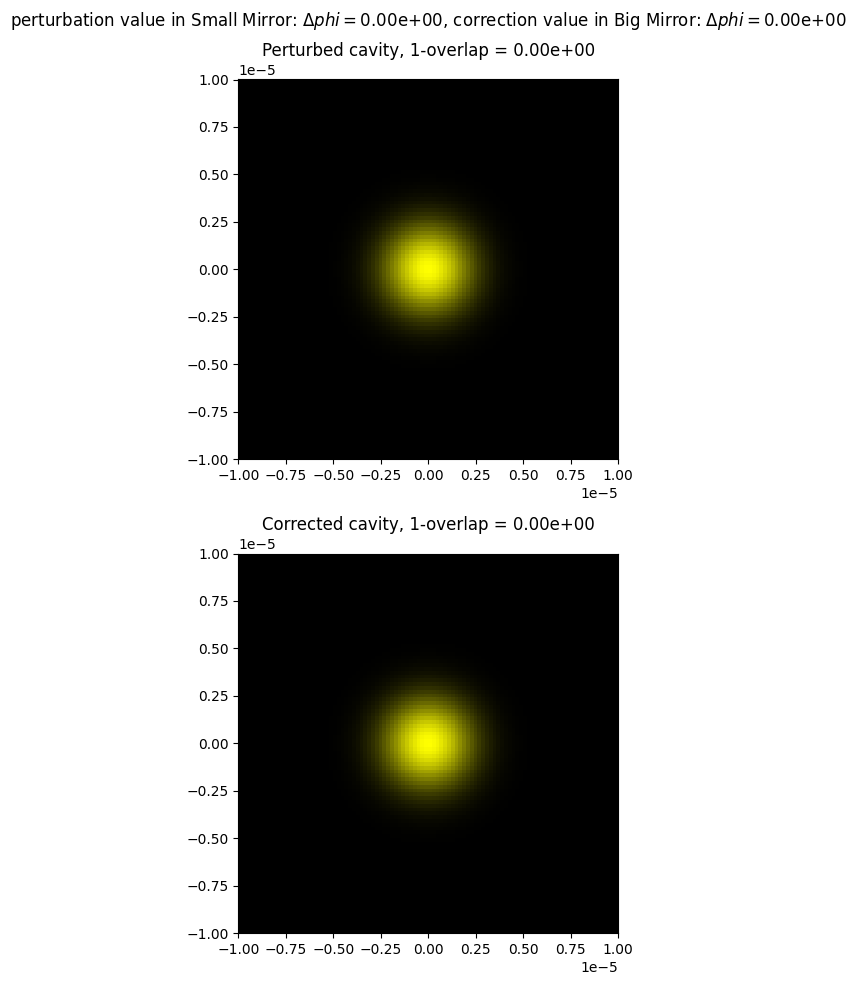

interactive(children=(Dropdown(description='Perturbed Element', options=(('Small Mirror', 0), ('Lens', 1)), st…

In [7]:
lambda_0_laser = 1064e-9
params = [OpticalElementParams(name='Small Mirror', surface_type='curved_mirror'            , x=-5e-03               , y=0                    , z=0                    , theta=0                    , phi=-1e+00 * np.pi       , r_1=5.000045315676729e-03, r_2=np.nan               , curvature_sign=CurvatureSigns.concave, T_c=np.nan               , n_inside_or_after=1e+00                , n_outside_or_before=1e+00                , material_properties=MaterialProperties(refractive_index=None                 , alpha_expansion=7.5e-08              , beta_surface_absorption=1e-06                , kappa_conductivity=1.31e+00             , dn_dT=None                 , nu_poisson_ratio=1.7e-01              , alpha_volume_absorption=None                 , intensity_reflectivity=9.99889e-01          , intensity_transmittance=1e-04                , temperature=np.nan               )),
          OpticalElementParams(name='Lens',         surface_type='thick_lens'               , x=6.456776823267892e-03, y=0                    , z=0                    , theta=0                    , phi=0                    , r_1=2.424176903520436e-02, r_2=5.487903137228402e-03, curvature_sign=CurvatureSigns.concave, T_c=2.913553646535783e-03, n_inside_or_after=1.76e+00             , n_outside_or_before=1e+00                , material_properties=PHYSICAL_SIZES_DICT['material_properties_sapphire']),
          OpticalElementParams(name='Big Mirror',   surface_type='curved_mirror'            , x=3.079135536465358e-01, y=0                    , z=0                    , theta=0                    , phi=0                    , r_1=1.504597593390832e-01, r_2=np.nan               , curvature_sign=CurvatureSigns.concave, T_c=np.nan               , n_inside_or_after=1e+00                , n_outside_or_before=1e+00                , material_properties=MaterialProperties(refractive_index=None                 , alpha_expansion=7.5e-08              , beta_surface_absorption=1e-06                , kappa_conductivity=1.31e+00             , dn_dT=None                 , nu_poisson_ratio=1.7e-01              , alpha_volume_absorption=None                 , intensity_reflectivity=9.99889e-01          , intensity_transmittance=1e-04                , temperature=np.nan               ))]
from matplotlib.lines import Line2D
def smooth_widget_value(x):
    
    value = np.sign(x) * (10 ** (np.abs(x) - 10) - 10**-10)
    return value


cavity_0 = Cavity.from_params(params=params,
                            standing_wave=True,
                            lambda_0_laser=lambda_0_laser,
                            set_central_line=True,
                            set_mode_parameters=True,
                            set_initial_surface=False,
                            t_is_trivial=True,
                            p_is_trivial=True,
                            power=2e4,
                            use_paraxial_ray_tracing=True,
                            debug_printing_level=1,
                            )
CORRECTION_ELEMENT_INDEX = 2  # this is always 2 because we correct with the large mirror


def f(perturbation_element_index, perturbation_parameter, perturbation_value_log, perturbation_value_log_fine, correction_parameter, initial_guess_for_correction_log):
    # %%
    perturbation_value = smooth_widget_value(perturbation_value_log + perturbation_value_log_fine)
    initial_guess = smooth_widget_value(initial_guess_for_correction_log)
    
    perturbation_pointer = PerturbationPointer(element_index=perturbation_element_index,
                                               parameter_name=perturbation_parameter,
                                               perturbation_value=perturbation_value)
    
    perturbed_cavity = perturb_cavity(cavity=cavity_0, perturbation_pointer=perturbation_pointer)
    
    fig, ax = plt.subplots()
    cavity_0.plot(laser_color='r', ax=ax)
    perturbed_cavity.plot(laser_color='g', ax=ax)
    plt.grid()
    plt.show()
    print(f"{perturbation_value=:.2e}")
    print(f"{initial_guess=:.2e}")
    # %%
    
    def overlap_extractor(cavity):
        overlap = np.abs(calculate_cavities_overlap(cavity_0, cavity))
        return overlap
    
    correction_pointer = PerturbationPointer(element_index=CORRECTION_ELEMENT_INDEX,
                                             parameter_name=correction_parameter)
    
    corrected_cavity, correction_value = find_required_perturbation_for_desired_change(cavity=perturbed_cavity,
                                                                     perturbation_pointer=correction_pointer,
                                                                     desired_parameter=overlap_extractor,
                                                                     desired_value=1,
                                                                     x0=initial_guess,
                                                                     xtol=1e-10,
                                                                     print_progress=True)
    # %%
    print(f"perturbation_value: {getattr(corrected_cavity.to_params[2], perturbation_parameter):.2e}, "
          f"correction_value: {getattr(corrected_cavity.to_params[0], correction_parameter)}")
    
    print(f"Perturbed 1-overlap: {1-np.abs(calculate_cavities_overlap(cavity_0, perturbed_cavity)):.2e}, "
          f"Corrected 1-overlap: {1-np.abs(calculate_cavities_overlap(cavity_0, corrected_cavity)):.2e}")
    sup_title = (f"perturbation value in {cavity_0.names[perturbation_element_index]}: $\Delta {perturbation_parameter}=${perturbation_pointer.perturbation_value:.2e},"
                 f" correction value in {cavity_0.names[CORRECTION_ELEMENT_INDEX]}: $\Delta {correction_parameter}=${correction_value:.2e}")
    
    file_path = (f'figures/overlap_perturbation_correction/pert_elem={cavity_0.names[perturbation_element_index]} pert_parm={perturbation_parameter}'
                 f' corr_param={correction_parameter} plane=')
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    plt.suptitle(sup_title)
    plot_2_cavity_perturbation_overlap(cavity=cavity_0, second_cavity=perturbed_cavity, ax=ax[0], axis_span=1e-5)
    plot_2_cavity_perturbation_overlap(cavity=cavity_0, second_cavity=corrected_cavity, ax=ax[1], axis_span=1e-5)
    one_minus_overlap_perturbed = 1 - np.abs(calculate_cavities_overlap(cavity_0, perturbed_cavity))
    one_minus_overlap_corrected = 1 - np.abs(calculate_cavities_overlap(cavity_0, corrected_cavity))
    if one_minus_overlap_perturbed < 1e-3:
        perturbed_title = f'Perturbed cavity, 1-overlap = {one_minus_overlap_perturbed:.2e}'
    else:
        perturbed_title = f'Perturbed cavity, overlap = {1-one_minus_overlap_perturbed:.3f}'
    
    if one_minus_overlap_corrected < 1e-3:
        corrected_title = f'Corrected cavity, 1-overlap = {one_minus_overlap_corrected:.2e}'
    else:
        corrected_title = f'Corrected cavity, overlap = {1-one_minus_overlap_corrected:.3f}'
    
    ax[0].set_title(perturbed_title)
    ax[1].set_title(corrected_title)
    plt.tight_layout()
    plt.savefig(f'{file_path}transverse.svg', dpi=300, bbox_inches='tight')
    plt.show()
    
    # create a legend:
    custom_lines = [Line2D([0], [0], color='r', lw=1, linestyle='--', label='Original cavity'),
                    Line2D([0], [0], color='g', lw=1, linestyle='--', label='Perturbed cavity'),
                    Line2D([0], [0], color='b', lw=1, linestyle='--', label='Corrected cavity')]
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    for i, plane, plane_description in zip((0, 1), ('xy', 'xz'), ('perturbation plane', 'transverse plane')):
        cavity_0.plot(laser_color='r', ax=ax[i], plane=plane)
        perturbed_cavity.plot(laser_color='g', ax=ax[i], plane=plane)
        corrected_cavity.plot(laser_color='b', ax=ax[i], plane=plane)
    
        ax[i].set_title(plane_description)
        ax[i].set_ylim(-4e-3, 4e-3)
        print(ax[i].get_ylim())
        ax[i].annotate('blue line on top of red line appear purple', xy=(ax[i].get_xlim()[0] + (ax[i].get_xlim()[1] - ax[i].get_xlim()[0]) / 3, ax[i].get_ylim()[0] + (ax[i].get_ylim()[1] - ax[i].get_ylim()[0]) / 4))
    
        ax[i].legend(handles=custom_lines, loc='lower center')
    
    plt.suptitle(sup_title)
    plt.tight_layout()
    plt.savefig(f'{file_path}longitudinal.svg', dpi=300, bbox_inches='tight')
    plt.show()

dx=1e-10

widgets.interact(f,
                 perturbation_element_index=widgets.Dropdown(options=[('Small Mirror', 0), ('Lens', 1)], value=0, description='Perturbed Element', style={'description_width': 'initial'}),
                 perturbation_parameter=widgets.Dropdown(options=['phi', 'y', 'x'], value='phi', description='Perturbed Parameter', style={'description_width': 'initial'}),
                 perturbation_value_log=FloatSlider(value=0, min=-10, max=10, step=dx, description='Log of perturbation value', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='1500px'), ),
                 perturbation_value_log_fine=FloatSlider(value=0, min=-0.1, max=0.1, step=dx, description='Log of perturbation value_fine', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='1500px'), ),
                 correction_parameter=widgets.Dropdown(options=['phi', 'y', 'x'], value='phi', description='Correction Parameter', style={'description_width': 'initial'}),
                 initial_guess_for_correction_log=FloatSlider(value=0, min=-10, max=10, step=dx, description='Log of initial guess for correction', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='1500px'), ),
                 );